<h1><center>Compressed Sensing & Sparse Recovery</center></h1>
<h2><center>by Jaidev Deshpande</center></h2>
<h3><center>Data Scientist @ Cube26 Software Pvt Ltd</center></h3>

<div style="text-align: center">
<div id="social">
<div id="social_twitter">
    <a href="http://twitter.com/jaidevd"><img src="images/twitter-128.png" width="32" height="32">
    </a>
</div>
<div id="social_medium">
    <a href="http://medium.com/@jaidevd"><img src="images/medium.ico" width="32" height="32"></a>
</div>
<div id="social_github">
    <a href="http://github.com/jaidevd"><img src="images/mark-github-128.png" width="32" height="32"></a>
</div>
</div>
</div>

<div style="text-align: center"><font size="4"><strong>@jaidevd</strong></font></div>

# Regression & Linear Systems
## Overdetermined System of Equations

----------
$$ Ax = b \mid A \in I\!R^{m \times n} \mid m > n $$
----------

## Overdetermined system == Least Squares Minimization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import lstsq
from scipy.fftpack import dct, idct
from sklearn.linear_model import LinearRegression, Lasso
from IPython.display import Audio

(<matplotlib.axes._subplots.AxesSubplot at 0x10ca62850>,
 <matplotlib.legend.Legend at 0x10f54fa10>)

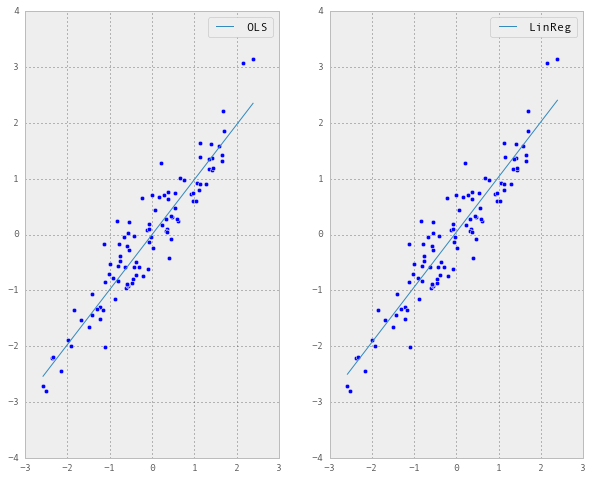

In [2]:
A = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], size=(100,))
X = A[:, 0].reshape(-1, 1)
y = A[:, 1].reshape(-1, 1)
x_ls = np.linalg.lstsq(X, y)[0]
lr = LinearRegression().fit(X, y)
x_lr = lr.coef_

xx = np.linspace(X.min(), X.max(), 100)
yy_ls = xx * x_ls
yy_lr = lr.predict(xx.reshape(-1, 1))

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.scatter(X.ravel(), y.ravel()), plt.plot(xx, yy_ls.ravel(), label="OLS"), plt.legend()
plt.subplot(122), plt.scatter(X.ravel(), y.ravel()), plt.plot(xx, yy_lr.ravel(), label="LinReg"), plt.legend()

# Underdetermined System of Equations
-----------

$$Ax = b \mid A \in I\!R^{m \times n} \mid m < n$$

----------------

# The Simplest Impossible Problem
## Which two numbers have the mean 3?


### Arithmetic mean as matrix multiplication
$ A = \begin{bmatrix}
0.5 & 0.5 \\
0 & 0
\end{bmatrix}$

$b = \begin{bmatrix}
3\\
0
\end{bmatrix} $


$x = \begin{bmatrix}
x_{1}\\
x_{2}
\end{bmatrix}$

Then solve
$Ax = b$

In [3]:
print "Ordinary Least Squares (L2 minimization):"
A = np.array([[0.5, 0.5], [0, 0]])
b = np.array([[3], [0]])
print np.linalg.lstsq(A, b)[0]
print
print "Linear Regression (L2 minimization):"
lr.fit(A, b)
print lr.coef_
print
print "Lasso (L1 minimization):"
lasso = Lasso(alpha=0.0001)
lasso.fit(A, b)
print lasso.coef_

Ordinary Least Squares (L2 minimization):
[[ 3.]
 [ 3.]]

Linear Regression (L2 minimization):
[[ 3.  3.]]

Lasso (L1 minimization):
[ 5.9984  0.    ]


## Vector Norms

A norm $p$ of a vector $\mathbf{x} \in I\!R^{n}$ is defined as:

------------
$$ L_{p} = \bigg(\sum_{k=0}^{n-1} \left\lVert{x_{k}}\right\rVert^{p}\bigg)^{\frac{1}{p}}$$
------------

* ### For OLS / Regression, we've been minimizing $L_{2}$ (energy of the vector)
* ### $L_{1}$ norm is the shortest path through the vector
* ### $L_{0}$ norm is the sparsity of the vector*
* ### Under conditions like RIP, $L_{1}$ == $L_{0}$

([], <a list of 0 Text yticklabel objects>)

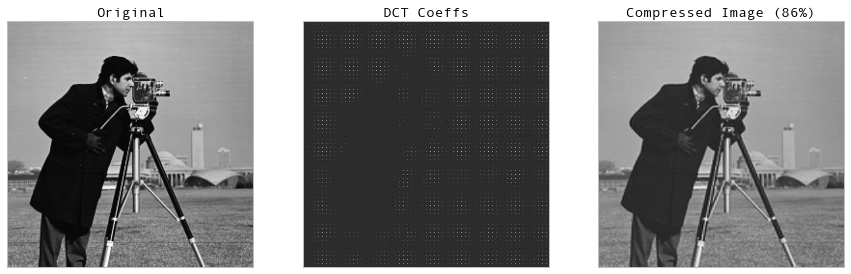

In [4]:
from skimage.data import camera
from skimage.util.shape import view_as_blocks


x = camera()
orgblocks = view_as_blocks(x, (8, 8))

rowaccum = []
for rowix in range(64):
    colaccum = []
    for colix in range(64):
        data = orgblocks[rowix, colix, ...]
        data = dct(dct(data.T).T)
        c_comp = np.zeros(data.shape)
        c_comp[:3, :3] = data[:3, :3]
        colaccum.append(c_comp)
    rowaccum.append(np.hstack(colaccum))
coefs = np.vstack(rowaccum)

cblocks = view_as_blocks(coefs, (8, 8))
rowaccum = []
for rowix in range(64):
    colaccum = []
    for colix in range(64):
        data = cblocks[rowix, colix, ...]
        data = idct(idct(data.T).T)
        colaccum.append(data)
    rowaccum.append(np.hstack(colaccum))
recons = np.vstack(rowaccum)


plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(coefs, cmap=plt.cm.gray)
plt.title('DCT Coeffs')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(recons, cmap=plt.cm.gray)
plt.title('Compressed Image (86%)')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Fourier Coefficients & Data Compression
## As a linear algebra problem

### Discrete Fourier Transform:
$$ X_{k} = \sum_{n = 0}^{N - 1} x_{n}e^{-2\pi ik\frac{n}{N}} \mid k \in [0, N - 1]$$

$$ \mathbf{X} = \mathbf{W}\mathbf{x} \mid W \in \mathbb{C}^{N \times N} \mid W_{mn} = e^{2\pi i \frac{mn}{N}} $$

$$ \begin{bmatrix}
X_{0}\\
X_{1}\\
\vdots\\
X_{N-1}\\
\end{bmatrix} = \begin{bmatrix}
e^{2\pi i \frac{0 \times 0}{N}} & e^{2\pi i \frac{0 \times 1}{N}} \ldots e^{2\pi i \frac{0 \times N}{N}}\\
e^{2\pi i \frac{1 \times 0}{N}} & e^{2\pi i \frac{1 \times 1}{N}} \ldots e^{2\pi i \frac{1 \times N}{N}}\\
\vdots\\
e^{2\pi i \frac{N \times 0}{N}} & e^{2\pi i \frac{N \times 1}{N}} \ldots e^{2\pi i \frac{N \times N}{N}}\\
\end{bmatrix}
\begin{bmatrix}
x_{0}\\
x_{1}\\
\vdots\\
x_{N - 1}
\end{bmatrix}$$

# OR...

$$ b = Ax $$

# DTMF Example

### A function $f = \Psi c$ where $\Psi$ is a set of basis functions and $c$ are the coefficients.
### $f$ can be sampled as $b = \Phi f$, where $\Phi$ is the sampling operator
### For reconstruction, solve $Ax = b$ where $A = \Phi\Psi$
### If solution worked, $x \approx c$
### Recover $f$ as $f = \Psi x$


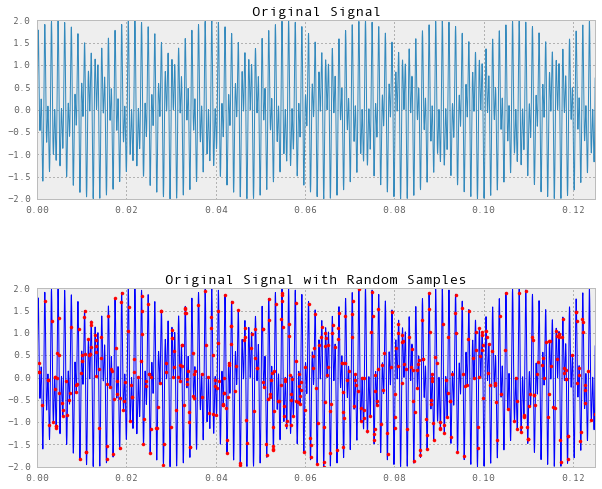

In [5]:
N = 5000
FS = 4e4
M = 500
f1, f2 = 697, 1336 # Pick any two touchtone frequencies
duration = 1./8
t = np.linspace(0, duration, duration*FS)
f = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
f = f.reshape(-1, 1)



# Displaying the test signal
plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(t,f)
plt.xlim(0, 0.125)
plt.title('Original Signal')
# Randomly sampling the test signal
k = np.random.randint(0,N,(M,))
k = np.sort(k) # making sure the random samples are monotonic
b = f[k]
plt.subplot(212), plt.plot(t,f,'b', t[k],b,'r.')
plt.xlim(0, 0.125)
plt.title('Original Signal with Random Samples')

Audio(np.tile(f.ravel(), 10), rate=44100)

Sparsity: 9.62%


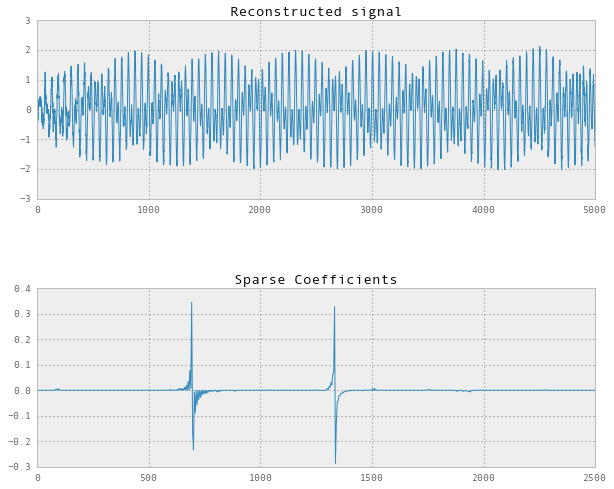

In [6]:
D = dct(np.eye(N), axis=0)
A = D[k,:]
lasso = Lasso(alpha=0.001)
lasso.fit(A, b)
print "Sparsity: {}%".format((lasso.coef_ != 0).sum() / float(lasso.coef_.shape[0]) * 100)
recons = idct(lasso.coef_)
plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(recons)
plt.title('Reconstructed signal')
plt.subplot(212), plt.plot(np.linspace(0, FS/2, N), lasso.coef_), plt.xlim(0, 2500)
plt.title('Sparse Coefficients')

Audio(np.tile(recons, 10),  rate=44100)

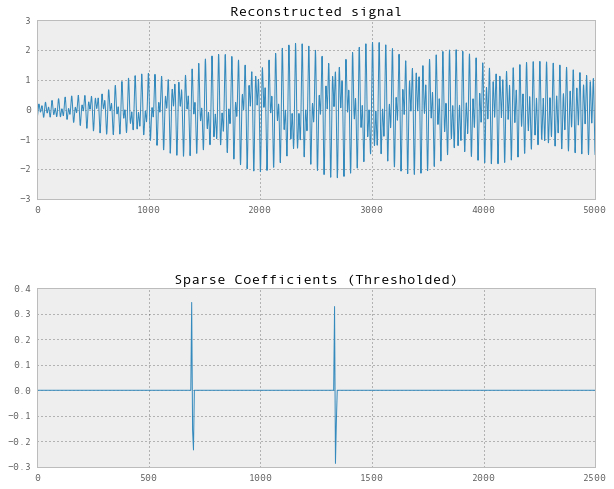

In [7]:
coefs = lasso.coef_.copy()
coefs[np.abs(coefs) <= 0.1] = 0
recons_th = idct(coefs)

plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(recons_th)
plt.title('Reconstructed signal')
plt.subplot(212), plt.plot(np.linspace(0, FS/2, N), coefs), plt.xlim(0, 2500)
plt.title('Sparse Coefficients (Thresholded)')

Audio(np.tile(recons_th, 10),  rate=44100)